## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [90]:
import pandas as pd
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

boston = datasets.load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.DataFrame(boston.target, columns = ['MEDV'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [91]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [92]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

#### 1.1 Confirmação de que a base está em formato adequado para o scikitlearn.

Scikitlearn não aceita variáveis nulas e de outros tipos que não sejam numéricas. Assim, vamos ver os tipos de dados que estão presentes na base utilizada. 
Para uma verificação mais direta, montemos uma tabela com todas as variáveis ao invés de analisar X e y.

In [93]:
base_boston = X.copy()
base_boston['MEDV'] = y.copy()
base_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


Verifica-se que todas as variáveis em base_boston são do tipo float64, sendo que nenhuma delas apresenta algum valor nulo. Logo, a base está em um formato adequado.

#### 1.2 Visualização da matriz de correlação e verificação de alguma variável com potencial preditivo interessante.

Montando a matriz de correlação, dando mais atenção aos valores na última coluna onde encontra-se a variável resposta "MEDV".

In [94]:
base_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Há muitas variáveis presentes na base. Para uma melhor visualização das relações entre elas, vamos ver um cluster map:

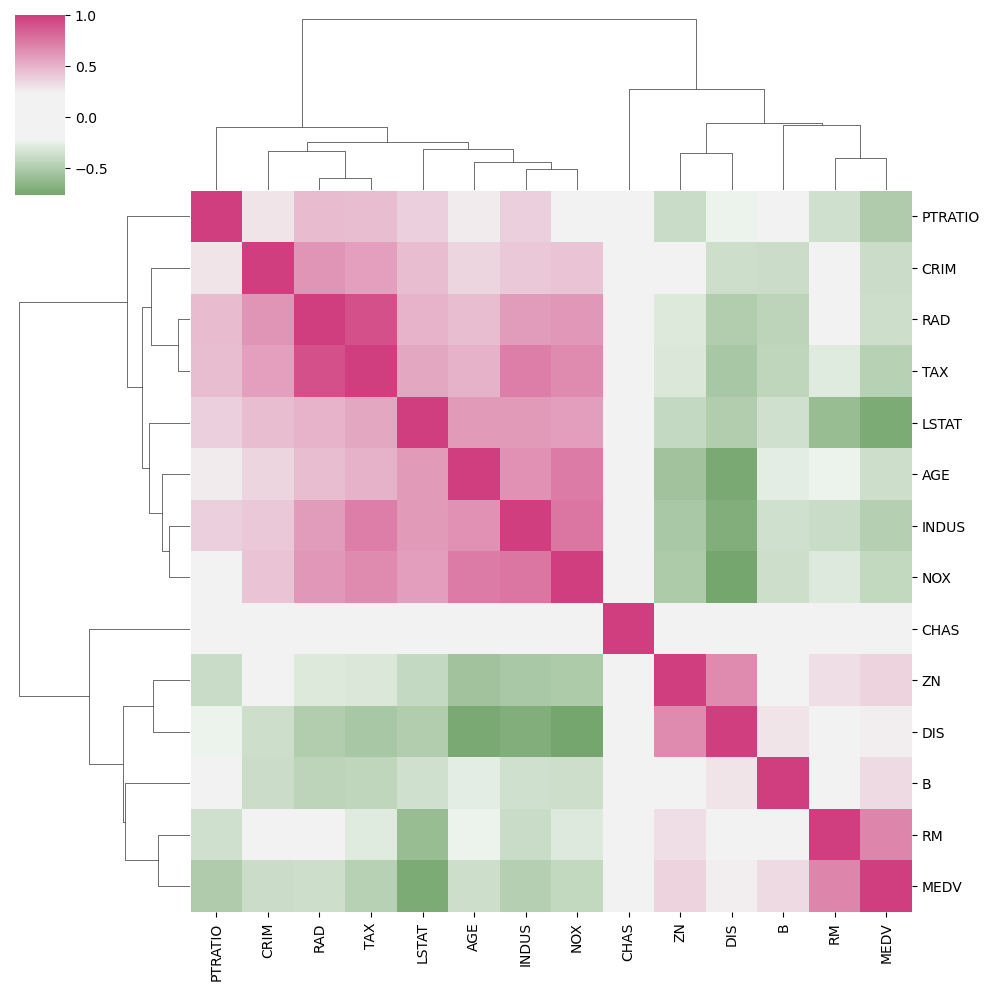

In [95]:
cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep=60, center='light')
sns.clustermap(base_boston.corr(), figsize=(10,10), center=0, cmap=cmap)

Visualizando o gráfico, há duas variáveis que chamam atenção em relação à variável resposta "MEDV", sendo elas a "RM" (número médio de quartos por ocupação), que apresenta uma cor rosada quase escura, estando entre 0.5 e 1 (verificando a relação na matriz de correlação, percebe-se que a relação entre elas é 0.69); e a variável "LSTAT" (porcentagem da população com status inferior), estando esta com uma cor verde escura, cuja correlação é menor do que -0.5 (pela matriz de correlação, aproximadamente -0.74).

#### 1.3. Separação dos dados em validação e teste.

Sejam X_teste e y_teste as variáveis de teste, enquanto que X_valid e y_valid são as variáveis de validação. Além disso, tomemos um número inteiro aleatório em random_state para que os dados sejam sempre os mesmos. 

In [96]:
X_teste, X_valid, y_teste, y_valid = train_test_split(X, y, random_state=2360873)

#### 1.4 Treino de uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

No exercício anterior foram geradas duas árvores, uma com profundidade = 2 e outra com profundidade = 8. Considerando que a visualizada foi a de profundidade = 2, usemos a da profundidade = 8.

In [104]:
arvore1 = DecisionTreeRegressor(max_depth=8)

arvore1.fit(X_teste, y_teste)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

Seja "caminho" a variável na qual encontram-se os CCP-alfas e impurezas da ávore gerada.

In [105]:
caminho = arvore1.cost_complexity_pruning_path(X_teste, y_teste)
caminho

{'ccp_alphas': array([0.00000000e+00, 2.39972217e-15, 1.31926121e-05, 1.18733509e-04,
        2.11081794e-04, 3.29815303e-04, 3.29815303e-04, 3.29815303e-04,
        5.32102023e-04, 6.46437995e-04, 7.43183817e-04, 8.44327177e-04,
        8.61917326e-04, 1.31926121e-03, 1.31926121e-03, 1.59630607e-03,
        1.93931398e-03, 1.94283201e-03, 2.54177661e-03, 2.58575198e-03,
        2.58575198e-03, 2.96833773e-03, 3.37730871e-03, 3.44766931e-03,
        3.74010554e-03, 4.76253298e-03, 5.57387863e-03, 6.05892700e-03,
        6.35004398e-03, 7.14379947e-03, 7.39226033e-03, 7.44415128e-03,
        9.04636261e-03, 9.69656992e-03, 1.43667546e-02, 1.48636763e-02,
        1.59630607e-02, 1.61609499e-02, 1.74854881e-02, 1.80123131e-02,
        1.82438120e-02, 1.85795954e-02, 1.90501319e-02, 1.90501319e-02,
        2.11081794e-02, 2.11081794e-02, 2.17733069e-02, 2.20903694e-02,
        2.43500021e-02, 2.64127089e-02, 2.80512627e-02, 3.83189471e-02,
        4.02249026e-02, 4.84828496e-02, 5.56300046

Separando os CCP-alfas das impurezas da árvore através das variáveis "ccp_alphas" e "impurezas", visualizemos a relação entre eles. 

Text(0, 0.5, 'Impureza das folhas')

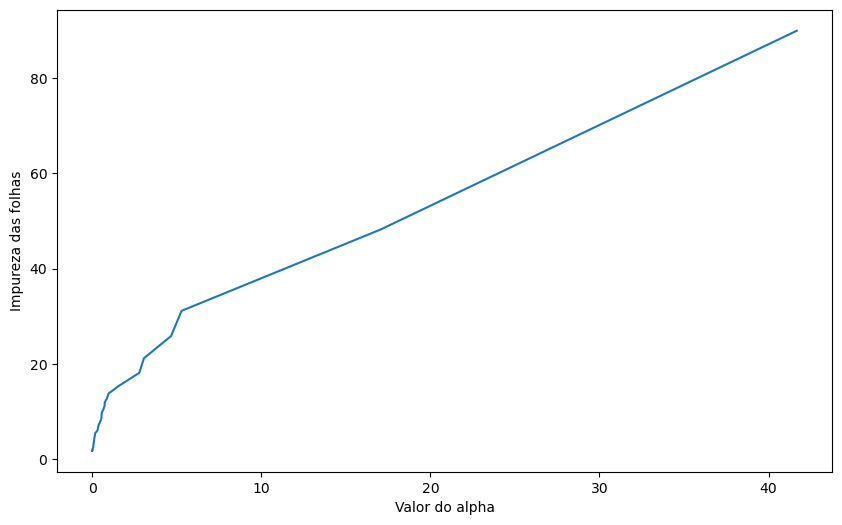

In [106]:
ccp_alphas, impurezas = caminho.ccp_alphas, caminho.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurezas)
plt.xlabel("Valor do alpha")
plt.ylabel("Impureza das folhas")

Nota-se que quanto maior o valor do CCP-alfa, maior a impureza das folhas da árvore gerada.

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

Seja "arvores_alpha" a lista na qual encontram-se as árvores geradas com cada valor de alpha obtido no item anterior.

In [115]:
arvores_alpha = []

for alpha in ccp_alphas:
    arvore_alpha = DecisionTreeRegressor(random_state=0, ccp_alpha=alpha)
    arvore_alpha.fit(X_teste, y_teste)
    arvores_alpha.append(arvore_alpha)

Verificação dos itens presentes na lista gerada:

In [116]:
arvores_alfa

[DecisionTreeRegressor(random_state=0),
 DecisionTreeRegressor(ccp_alpha=1.3192612137191168e-05, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00011873350923202083, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00021108179419685846, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0003298153034252797, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.00032981530342992914, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0003298153034302666, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0005321020228674603, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0006464379947226672, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0007431838170620691, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0008443271767809847, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0008619173263012891, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0013192612137209166, random_state=0),
 DecisionTreeRegressor(ccp_alpha=0.0013192612137216664, random_state=0),
 Decisi

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Calculando os MSE de cada árvore da lista, tanto na base de teste quanto na de verificação e inserindo-os em listas nomeadas "mse_teste" e "mse_validacao":

In [117]:
mse_teste = [mean_squared_error(y_teste, arvore.predict(X_teste)) for arvore in arvores_alfa]
mse_validacao = [mean_squared_error(y_valid, arvore.predict(X_valid)) for arvore in arvores_alfa]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Gerando um gráfico na qual encontram-se tantos os MSE na base de teste quanto na de validação:

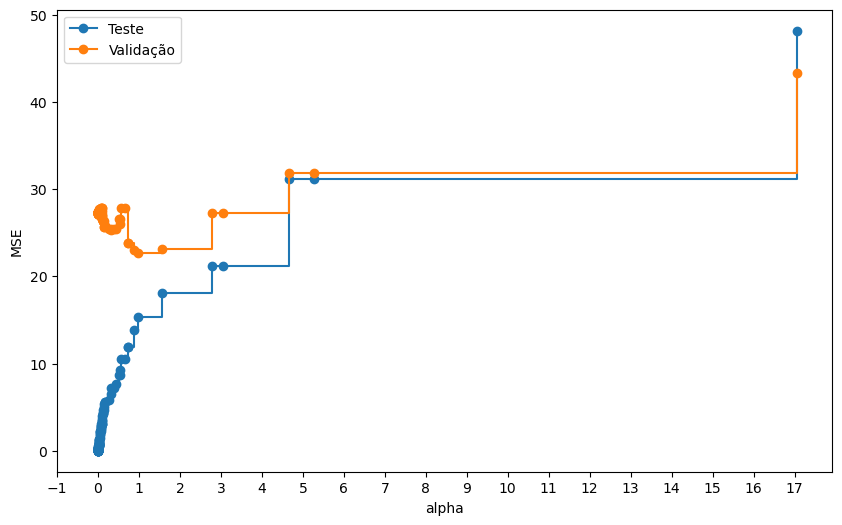

In [135]:
figura, eixos = plt.subplots(figsize=(10, 6))
eixos.set_xlabel("alpha")
eixos.set_ylabel("MSE")
eixos.plot(ccp_alphas[:-1], mse_teste, marker='o', label="Teste",
        drawstyle="steps-post")
eixos.plot(ccp_alphas[:-1], mse_validacao, marker='o', label="Validação",
        drawstyle="steps-post")
eixos.legend()
plt.xticks(range(-1, 18, 1))
plt.show()

Observa-se que o MSE mínimo da base de validação está na região em alpha = 1.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

Gerando uma árvore com o alpha = 1 na base de teste e verificando o seu R-quadrado na base de validação:

In [138]:
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=1)
arvore_final.fit(X_teste, y_teste)

print(f"O R-quadrado da ávore com alpha = 1 na base de validação é: {arvore_final.score(X_valid, y_valid):.2f}")

O R-quadrado da ávore com alpha = 1 na base de validação é: 0.66


### 7. Visualize esta árvore.

Realizando a visualização da árvore através do graphviz:

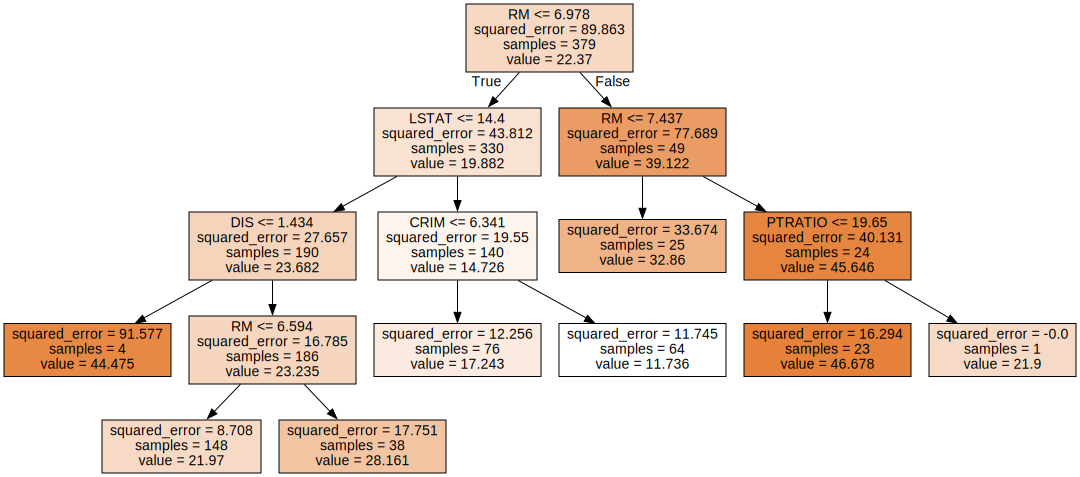

In [139]:
dados_arvore = tree.export_graphviz(arvore_final, out_file=None,
                                    feature_names=X.columns,
                                    filled=True)

grafico_arvore = graphviz.Source(dados_arvore, format="png")
grafico_arvore

Novamente, a variável presente no nó raíz é a RM, seguida pela LSTAT, tal como foi no exercício 1. Entretanto, na nova árvore também encontram-se as variáveis CRIM (taxa de crimes per-capita da cidade), DIS (distâncias ponderadas entre até cinco centros de empregos de Boston) e PTRATIO (razão pupilo-professor da cidade).